In [ ]:
from pyspark.sql.functions import col,isnan, when, count
from pyspark.sql.types import IntegerType, DoubleType
from pyspark import SparkFiles
 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#구글 드라이버에서 다운로드 받을 파일의 URL
url = "https://drive.google.com/uc?id=1hLyqMbl5foc96lDJk6_KWJ_RLVOtIzIJ"



In [ ]:
spark.sparkContext.addFile(url)


In [ ]:
SparkFiles.getRootDirectory()

Out[38]: '/local_disk0/spark-364faeed-22bb-43fb-bdf3-76a680585a1e/userFiles-be75e67d-354a-4344-a69a-2fccb8104d50'

In [ ]:
os.listdir(SparkFiles.getRootDirectory())

Out[39]: ['uc']

In [ ]:
df_train = spark.read.csv("file://"+SparkFiles.get('uc'), header=True)

In [ ]:
column_name_list = df_train.columns

In [ ]:
int_column_list = column_name_list[1:2]+column_name_list[5:7] + column_name_list[11:12]

In [ ]:
int_column_list

Out[43]: ['Pclass', 'SibSp', 'Parch', 'Survived']

In [ ]:
for column_name in int_column_list:

    print("column_name = ", column_name)
    df_train = df_train.withColumn(column_name, df_train[column_name].cast('int'))
    print('='*100)

column_name =  Pclass
column_name =  SibSp
column_name =  Parch
column_name =  Survived


In [ ]:
double_column_list = column_name_list[4:5] + column_name_list[8:9]

In [ ]:
double_column_list

Out[46]: ['Age', 'Fare']

In [ ]:
for column_name in double_column_list:

    print('column_name = ', column_name)
    df_train = df_train.withColumn(column_name, df_train[column_name].cast('double'))
    print('='*100)

column_name =  Age
column_name =  Fare


In [ ]:
display(df_train.summary())

summary PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived count 891 891 891 891 714 891 891 891 891 204 889 891 mean 446.0 2.308641975308642 null null 29.69911764705882 0.5230078563411896 0.38159371492704824 260318.54916792738 32.2042079685746 null null 0.3838383838383838 stddev 257.3538420152301 0.8360712409770491 null null 14.526497332334035 1.1027434322934315 0.8060572211299488 471609.26868834975 49.69342859718089 null null 0.48659245426485753 min 1 1 "Andersson, Mr. August Edvard (""Wennerstrom"")" female 0.42 0 0 110152 0.0 A10 C 0 25% 223.0 2 null null 20.0 0 0 19996.0 7.8958 null null 0 50% 446.0 3 null null 28.0 0 0 236171.0 14.4542 null null 0 75% 669.0 3 null null 38.0 1 0 347743.0 31.0 null null 1 max 99 3 van Melkebeke, Mr. Philemon male 80.0 8 6 WE/P 5735 512.3292 T S 1

In [ ]:
### type 전처리 완료

In [ ]:
psample_df = df_train.toPandas()

In [ ]:
psample_df

PassengerId 
 Pclass 
 Name 
 Sex 
 Age 
 SibSp 
 Parch 
 Ticket 
 Fare 
 Cabin 
 Embarked 
 Survived 
 
 
 
 
 0 
 1 
 3 
 Braund, Mr. Owen Harris 
 male 
 22.0 
 1 
 0 
 A/5 21171 
 7.2500 
 None 
 S 
 0 
 
 
 1 
 2 
 1 
 Cumings, Mrs. John Bradley (Florence Briggs Th... 
 female 
 38.0 
 1 
 0 
 PC 17599 
 71.2833 
 C85 
 C 
 1 
 
 
 2 
 3 
 3 
 Heikkinen, Miss. Laina 
 female 
 26.0 
 0 
 0 
 STON/O2. 3101282 
 7.9250 
 None 
 S 
 1 
 
 
 3 
 4 
 1 
 Futrelle, Mrs. Jacques Heath (Lily May Peel) 
 female 
 35.0 
 1 
 0 
 113803 
 53.1000 
 C123 
 S 
 1 
 
 
 4 
 5 
 3 
 Allen, Mr. William Henry 
 male 
 35.0 
 0 
 0 
 373450 
 8.0500 
 None 
 S 
 0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 886 
 887 
 2 
 Montvila, Rev. Juozas 
 male 
 27.0 
 0 
 0 
 211536 
 13.0000 
 None 
 S 
 0 
 
 
 887 
 888 
 1 
 Graham, Miss. Margaret Edith 
 female 
 19.0 
 0 
 0 
 112053 
 30.0000 
 B42 
 S 
 1 
 
 
 888 
 889 
 3 
 "Johnston, Miss. Catherine Helen ""Carrie""" 
 female 
 NaN 
 1 
 2 
 W./C. 6607 
 23.4500 
 None 
 S 
 0 
 
 
 889 
 890 
 1 
 Behr, Mr. Karl Howell 
 male 
 26.0 
 0 
 0 
 111369 
 30.0000 
 C148 
 C 
 1 
 
 
 890 
 891 
 3 
 Dooley, Mr. Patrick 
 male 
 32.0 
 0 
 0 
 370376 
 7.7500 
 None 
 Q 
 0 
 
 
 
 891 rows × 12 columns

In [ ]:
psample_df.skew()

#fare이 많이 기울어져 있

Out[52]: PassengerId    0.000000
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Survived       0.478523
dtype: float64

Out[53]: (array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

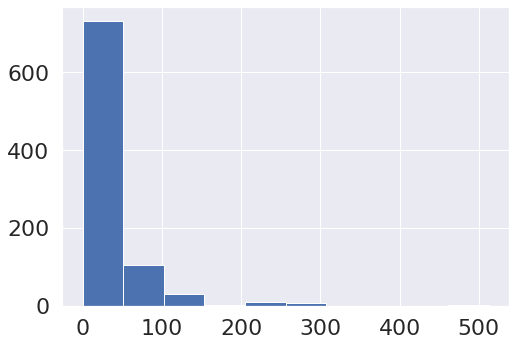

In [ ]:
plt.hist(psample_df['Fare'])

In [ ]:
from pyspark.sql.functions import log1p

df_train = df_train.withColumn('Fare', log1p('Fare'))

In [ ]:
display(df_train) #fare값이 log로 수

PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived 1 3 Braund, Mr. Owen Harris male 22.0 1 0 A/5 21171 2.1102132003465894 null S 0 2 1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0 1 0 PC 17599 4.2805931204649 C85 C 1 3 3 Heikkinen, Miss. Laina female 26.0 0 0 STON/O2. 3101282 2.188856327665703 null S 1 4 1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0 1 0 113803 3.9908341858524357 C123 S 1 5 3 Allen, Mr. William Henry male 35.0 0 0 373450 2.2027647577118348 null S 0 6 3 Moran, Mr. James male null 0 0 330877 2.246892662898172 null Q 0 7 1 McCarthy, Mr. Timothy J male 54.0 0 0 17463 3.967694202798607 E46 S 0 8 3 Palsson, Master. Gosta Leonard male 2.0 3 1 349909 3.094445746490024 null S 0 9 3 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) female 27.0 0 2 347742 2.4959537387180646 null S 1 10 2 Nasser, Mrs. Nicholas (Adele Achem) female 14.0 1 0 237736 3.436268471383741 null C 1 11 3 Sandstrom, Miss. Marguerite Rut female 4.0 1 1 PP 9549 2.8735646395797834 G6 S 1 12 1 Bonnell, Miss. Elizabeth female 58.0 0 0 113783 3.3160025355989236 C103 S 1 13 3 Saundercock, Mr. William Henry male 20.0 0 0 A/5. 2151 2.2027647577118348 null S 0 14 3 Andersson, Mr. Anders Johan male 39.0 1 5 347082 3.4742929367327062 null S 0 15 3 Vestrom, Miss. Hulda Amanda Adolfina female 14.0 0 0 350406 2.180891922715322 null S 0 16 2 Hewlett, Mrs. (Mary D Kingcome) female 55.0 0 0 248706 2.833213344056216 null S 1 17 3 Rice, Master. Eugene male 2.0 4 1 382652 3.405355391810819 null Q 0 18 2 Williams, Mr. Charles Eugene male null 0 0 244373 2.639057329615259 null S 1 19 3 Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) female 31.0 1 0 345763 2.9444389791664403 null S 0 20 3 Masselmani, Mrs. Fatima female null 0 0 2649 2.1071782966514356 null C 1 21 2 Fynney, Mr. Joseph J male 35.0 0 0 239865 3.295836866004329 null S 0 22 2 Beesley, Mr. Lawrence male 34.0 0 0 248698 2.639057329615259 D56 S 1 23 3 "McGowan, Miss. Anna ""Annie""" female 15.0 0 0 330923 2.2004637699272855 null Q 1 24 1 Sloper, Mr. William Thompson male 28.0 0 0 113788 3.597312260588446 A6 S 1 25 3 Palsson, Miss. Torborg Danira female 8.0 3 1 349909 3.094445746490024 null S 0 26 3 Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) female 38.0 1 5 347077 3.4777725458882283 null S 1 27 3 Emir, Mr. Farred Chehab male null 0 0 2631 2.1071782966514356 null C 0 28 1 Fortune, Mr. Charles Alexander male 19.0 3 2 19950 5.575949103146316 C23 C25 C27 S 0 29 3 "O'Dwyer, Miss. Ellen ""Nellie""" female null 0 0 330959 2.1837114628556327 null Q 1 30 3 Todoroff, Mr. Lalio male null 0 0 349216 2.1855792552411137 null S 0 31 1 Uruchurtu, Don. Manuel E male 40.0 0 0 PC 17601 3.357621598945279 null C 0 32 1 Spencer, Mrs. William Augustus (Marie Eugenie) female null 1 0 PC 17569 4.993969182787072 B78 C 1 33 3 Glynn, Miss. Mary Agatha female null 0 0 335677 2.169053700369523 null Q 1 34 2 Wheadon, Mr. Edward H male 66.0 0 0 C.A. 24579 2.4423470353692043 null S 0 35 1 Meyer, Mr. Edgar Joseph male 28.0 1 0 PC 17604 4.420896324687287 null C 0 36 1 Holverson, Mr. Alexander Oskar male 42.0 1 0 113789 3.970291913552122 null S 0 37 3 Mamee, Mr. Hanna male null 0 0 2677 2.1076888046179385 null C 1 38 3 Cann, Mr. Ernest Charles male 21.0 0 0 A./5. 2152 2.2027647577118348 null S 0 39 3 Vander Planke, Miss. Augusta Maria female 18.0 2 0 345764 2.9444389791664403 null S 0 40 3 Nicola-Yarred, Miss. Jamila female 14.0 1 0 2651 2.5048481563289 null C 1 41 3 Ahlin, Mrs. Johan (Johanna Persdotter Larsson) female 40.0 1 0 7546 2.3489914658082016 null S 0 42 2 Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott) female 27.0 1 0 11668 3.091042453358316 null S 0 43 3 Kraeff, Mr. Theodor male null 0 0 349253 2.1855792552411137 null C 0 44 2 Laroche, Miss. Simonne Marie Anne Andree female 3.0 1 2 SC/Paris 2123 3.7513658711253766 null C 1 45 3 Devaney, Miss. Margaret Delia female 19.0 0 0 330958 2.1837114628556327 null Q 1 46 3 Rogers, Mr. William John male null 0

In [ ]:
psample_df = df_train.toPandas()
psample_df 

PassengerId 
 Pclass 
 Name 
 Sex 
 Age 
 SibSp 
 Parch 
 Ticket 
 Fare 
 Cabin 
 Embarked 
 Survived 
 
 
 
 
 0 
 1 
 3 
 Braund, Mr. Owen Harris 
 male 
 22.0 
 1 
 0 
 A/5 21171 
 2.110213 
 None 
 S 
 0 
 
 
 1 
 2 
 1 
 Cumings, Mrs. John Bradley (Florence Briggs Th... 
 female 
 38.0 
 1 
 0 
 PC 17599 
 4.280593 
 C85 
 C 
 1 
 
 
 2 
 3 
 3 
 Heikkinen, Miss. Laina 
 female 
 26.0 
 0 
 0 
 STON/O2. 3101282 
 2.188856 
 None 
 S 
 1 
 
 
 3 
 4 
 1 
 Futrelle, Mrs. Jacques Heath (Lily May Peel) 
 female 
 35.0 
 1 
 0 
 113803 
 3.990834 
 C123 
 S 
 1 
 
 
 4 
 5 
 3 
 Allen, Mr. William Henry 
 male 
 35.0 
 0 
 0 
 373450 
 2.202765 
 None 
 S 
 0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 886 
 887 
 2 
 Montvila, Rev. Juozas 
 male 
 27.0 
 0 
 0 
 211536 
 2.639057 
 None 
 S 
 0 
 
 
 887 
 888 
 1 
 Graham, Miss. Margaret Edith 
 female 
 19.0 
 0 
 0 
 112053 
 3.433987 
 B42 
 S 
 1 
 
 
 888 
 889 
 3 
 "Johnston, Miss. Catherine Helen ""Carrie""" 
 female 
 NaN 
 1 
 2 
 W./C. 6607 
 3.196630 
 None 
 S 
 0 
 
 
 889 
 890 
 1 
 Behr, Mr. Karl Howell 
 male 
 26.0 
 0 
 0 
 111369 
 3.433987 
 C148 
 C 
 1 
 
 
 890 
 891 
 3 
 Dooley, Mr. Patrick 
 male 
 32.0 
 0 
 0 
 370376 
 2.169054 
 None 
 Q 
 0 
 
 
 
 891 rows × 12 columns

In [ ]:
#fare의 기울기 감소
psample_df.skew()

Out[57]: PassengerId    0.000000
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           0.394928
Survived       0.478523
dtype: float64

Out[58]: (array([ 15.,   0.,   2., 350., 167., 182.,  85.,  59.,  28.,   3.]),
 array([0.        , 0.62409174, 1.24818347, 1.87227521, 2.49636694,
        3.12045868, 3.74455041, 4.36864215, 4.99273388, 5.61682562,
        6.24091735]),
 <BarContainer object of 10 artists>)

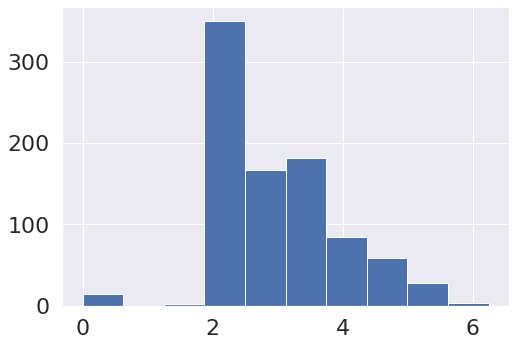

In [ ]:
plt.hist(psample_df['Fare'])

In [ ]:
df_train.withColumn('FamilySize', df_train['SibSp'] + df_train['Parch'] + 1 ).show()

+-----------+------+--------------------+------+----+-----+-----+----------------+------------------+-----+--------+--------+----------+
|PassengerId|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|              Fare|Cabin|Embarked|Survived|FamilySize|
+-----------+------+--------------------+------+----+-----+-----+----------------+------------------+-----+--------+--------+----------+
|          1|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|2.1102132003465894| null|       S|       0|         2|
|          2|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|   4.2805931204649|  C85|       C|       1|         2|
|          3|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282| 2.188856327665703| null|       S|       1|         1|
|          4|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|3.9908341858524357| C123|       S|       1|         2|
|          5|     3|Allen, Mr. Willia...|

In [ ]:
df_train = df_train.withColumn('FamilySize', df_train['SibSp'] + df_train['Parch'] + 1 )

In [ ]:
display(df_train)

PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived FamilySize 1 3 Braund, Mr. Owen Harris male 22.0 1 0 A/5 21171 2.1102132003465894 null S 0 2 2 1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0 1 0 PC 17599 4.2805931204649 C85 C 1 2 3 3 Heikkinen, Miss. Laina female 26.0 0 0 STON/O2. 3101282 2.188856327665703 null S 1 1 4 1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0 1 0 113803 3.9908341858524357 C123 S 1 2 5 3 Allen, Mr. William Henry male 35.0 0 0 373450 2.2027647577118348 null S 0 1 6 3 Moran, Mr. James male null 0 0 330877 2.246892662898172 null Q 0 1 7 1 McCarthy, Mr. Timothy J male 54.0 0 0 17463 3.967694202798607 E46 S 0 1 8 3 Palsson, Master. Gosta Leonard male 2.0 3 1 349909 3.094445746490024 null S 0 5 9 3 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) female 27.0 0 2 347742 2.4959537387180646 null S 1 3 10 2 Nasser, Mrs. Nicholas (Adele Achem) female 14.0 1 0 237736 3.436268471383741 null C 1 2 11 3 Sandstrom, Miss. Marguerite Rut female 4.0 1 1 PP 9549 2.8735646395797834 G6 S 1 3 12 1 Bonnell, Miss. Elizabeth female 58.0 0 0 113783 3.3160025355989236 C103 S 1 1 13 3 Saundercock, Mr. William Henry male 20.0 0 0 A/5. 2151 2.2027647577118348 null S 0 1 14 3 Andersson, Mr. Anders Johan male 39.0 1 5 347082 3.4742929367327062 null S 0 7 15 3 Vestrom, Miss. Hulda Amanda Adolfina female 14.0 0 0 350406 2.180891922715322 null S 0 1 16 2 Hewlett, Mrs. (Mary D Kingcome) female 55.0 0 0 248706 2.833213344056216 null S 1 1 17 3 Rice, Master. Eugene male 2.0 4 1 382652 3.405355391810819 null Q 0 6 18 2 Williams, Mr. Charles Eugene male null 0 0 244373 2.639057329615259 null S 1 1 19 3 Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) female 31.0 1 0 345763 2.9444389791664403 null S 0 2 20 3 Masselmani, Mrs. Fatima female null 0 0 2649 2.1071782966514356 null C 1 1 21 2 Fynney, Mr. Joseph J male 35.0 0 0 239865 3.295836866004329 null S 0 1 22 2 Beesley, Mr. Lawrence male 34.0 0 0 248698 2.639057329615259 D56 S 1 1 23 3 "McGowan, Miss. Anna ""Annie""" female 15.0 0 0 330923 2.2004637699272855 null Q 1 1 24 1 Sloper, Mr. William Thompson male 28.0 0 0 113788 3.597312260588446 A6 S 1 1 25 3 Palsson, Miss. Torborg Danira female 8.0 3 1 349909 3.094445746490024 null S 0 5 26 3 Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) female 38.0 1 5 347077 3.4777725458882283 null S 1 7 27 3 Emir, Mr. Farred Chehab male null 0 0 2631 2.1071782966514356 null C 0 1 28 1 Fortune, Mr. Charles Alexander male 19.0 3 2 19950 5.575949103146316 C23 C25 C27 S 0 6 29 3 "O'Dwyer, Miss. Ellen ""Nellie""" female null 0 0 330959 2.1837114628556327 null Q 1 1 30 3 Todoroff, Mr. Lalio male null 0 0 349216 2.1855792552411137 null S 0 1 31 1 Uruchurtu, Don. Manuel E male 40.0 0 0 PC 17601 3.357621598945279 null C 0 1 32 1 Spencer, Mrs. William Augustus (Marie Eugenie) female null 1 0 PC 17569 4.993969182787072 B78 C 1 2 33 3 Glynn, Miss. Mary Agatha female null 0 0 335677 2.169053700369523 null Q 1 1 34 2 Wheadon, Mr. Edward H male 66.0 0 0 C.A. 24579 2.4423470353692043 null S 0 1 35 1 Meyer, Mr. Edgar Joseph male 28.0 1 0 PC 17604 4.420896324687287 null C 0 2 36 1 Holverson, Mr. Alexander Oskar male 42.0 1 0 113789 3.970291913552122 null S 0 2 37 3 Mamee, Mr. Hanna male null 0 0 2677 2.1076888046179385 null C 1 1 38 3 Cann, Mr. Ernest Charles male 21.0 0 0 A./5. 2152 2.2027647577118348 null S 0 1 39 3 Vander Planke, Miss. Augusta Maria female 18.0 2 0 345764 2.9444389791664403 null S 0 3 40 3 Nicola-Yarred, Miss. Jamila female 14.0 1 0 2651 2.5048481563289 null C 1 2 41 3 Ahlin, Mrs. Johan (Johanna Persdotter Larsson) female 40.0 1 0 7546 2.3489914658082016 null S 0 2 42 2 Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott) female 27.0 1 0 11668 3.091042453358316 null S 0 2 43 3 Kraeff, Mr. Theodor male null 0 0 349253 2.1855792552411137 null C 0 1 44 2 Laroche, Miss. Simonne Marie Anne Andree female 3.0 1 2 SC/Paris 2123 3.7513658711253766 null C 1 4 45 3 Devaney, Miss. Margaret

In [ ]:
df_train.crosstab('FamilySize', 'Survived').show()

+-------------------+---+---+
|FamilySize_Survived|  0|  1|
+-------------------+---+---+
|                  5| 12|  3|
|                  1|374|163|
|                  6| 19|  3|
|                  2| 72| 89|
|                  7|  8|  4|
|                  3| 43| 59|
|                 11|  7|  0|
|                  8|  6|  0|
|                  4|  8| 21|
+-------------------+---+---+



In [ ]:
df_train.createOrReplaceTempView('titanic_view')

#Family size 추가 확4

In [ ]:
%sql
select * from titanic_view 

PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived FamilySize 1 3 Braund, Mr. Owen Harris male 22.0 1 0 A/5 21171 2.1102132003465894 null S 0 2 2 1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0 1 0 PC 17599 4.2805931204649 C85 C 1 2 3 3 Heikkinen, Miss. Laina female 26.0 0 0 STON/O2. 3101282 2.188856327665703 null S 1 1 4 1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0 1 0 113803 3.9908341858524357 C123 S 1 2 5 3 Allen, Mr. William Henry male 35.0 0 0 373450 2.2027647577118348 null S 0 1 6 3 Moran, Mr. James male null 0 0 330877 2.246892662898172 null Q 0 1 7 1 McCarthy, Mr. Timothy J male 54.0 0 0 17463 3.967694202798607 E46 S 0 1 8 3 Palsson, Master. Gosta Leonard male 2.0 3 1 349909 3.094445746490024 null S 0 5 9 3 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) female 27.0 0 2 347742 2.4959537387180646 null S 1 3 10 2 Nasser, Mrs. Nicholas (Adele Achem) female 14.0 1 0 237736 3.436268471383741 null C 1 2 11 3 Sandstrom, Miss. Marguerite Rut female 4.0 1 1 PP 9549 2.8735646395797834 G6 S 1 3 12 1 Bonnell, Miss. Elizabeth female 58.0 0 0 113783 3.3160025355989236 C103 S 1 1 13 3 Saundercock, Mr. William Henry male 20.0 0 0 A/5. 2151 2.2027647577118348 null S 0 1 14 3 Andersson, Mr. Anders Johan male 39.0 1 5 347082 3.4742929367327062 null S 0 7 15 3 Vestrom, Miss. Hulda Amanda Adolfina female 14.0 0 0 350406 2.180891922715322 null S 0 1 16 2 Hewlett, Mrs. (Mary D Kingcome) female 55.0 0 0 248706 2.833213344056216 null S 1 1 17 3 Rice, Master. Eugene male 2.0 4 1 382652 3.405355391810819 null Q 0 6 18 2 Williams, Mr. Charles Eugene male null 0 0 244373 2.639057329615259 null S 1 1 19 3 Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) female 31.0 1 0 345763 2.9444389791664403 null S 0 2 20 3 Masselmani, Mrs. Fatima female null 0 0 2649 2.1071782966514356 null C 1 1 21 2 Fynney, Mr. Joseph J male 35.0 0 0 239865 3.295836866004329 null S 0 1 22 2 Beesley, Mr. Lawrence male 34.0 0 0 248698 2.639057329615259 D56 S 1 1 23 3 "McGowan, Miss. Anna ""Annie""" female 15.0 0 0 330923 2.2004637699272855 null Q 1 1 24 1 Sloper, Mr. William Thompson male 28.0 0 0 113788 3.597312260588446 A6 S 1 1 25 3 Palsson, Miss. Torborg Danira female 8.0 3 1 349909 3.094445746490024 null S 0 5 26 3 Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) female 38.0 1 5 347077 3.4777725458882283 null S 1 7 27 3 Emir, Mr. Farred Chehab male null 0 0 2631 2.1071782966514356 null C 0 1 28 1 Fortune, Mr. Charles Alexander male 19.0 3 2 19950 5.575949103146316 C23 C25 C27 S 0 6 29 3 "O'Dwyer, Miss. Ellen ""Nellie""" female null 0 0 330959 2.1837114628556327 null Q 1 1 30 3 Todoroff, Mr. Lalio male null 0 0 349216 2.1855792552411137 null S 0 1 31 1 Uruchurtu, Don. Manuel E male 40.0 0 0 PC 17601 3.357621598945279 null C 0 1 32 1 Spencer, Mrs. William Augustus (Marie Eugenie) female null 1 0 PC 17569 4.993969182787072 B78 C 1 2 33 3 Glynn, Miss. Mary Agatha female null 0 0 335677 2.169053700369523 null Q 1 1 34 2 Wheadon, Mr. Edward H male 66.0 0 0 C.A. 24579 2.4423470353692043 null S 0 1 35 1 Meyer, Mr. Edgar Joseph male 28.0 1 0 PC 17604 4.420896324687287 null C 0 2 36 1 Holverson, Mr. Alexander Oskar male 42.0 1 0 113789 3.970291913552122 null S 0 2 37 3 Mamee, Mr. Hanna male null 0 0 2677 2.1076888046179385 null C 1 1 38 3 Cann, Mr. Ernest Charles male 21.0 0 0 A./5. 2152 2.2027647577118348 null S 0 1 39 3 Vander Planke, Miss. Augusta Maria female 18.0 2 0 345764 2.9444389791664403 null S 0 3 40 3 Nicola-Yarred, Miss. Jamila female 14.0 1 0 2651 2.5048481563289 null C 1 2 41 3 Ahlin, Mrs. Johan (Johanna Persdotter Larsson) female 40.0 1 0 7546 2.3489914658082016 null S 0 2 42 2 Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott) female 27.0 1 0 11668 3.091042453358316 null S 0 2 43 3 Kraeff, Mr. Theodor male null 0 0 349253 2.1855792552411137 null C 0 1 44 2 Laroche, Miss. Simonne Marie Anne Andree female 3.0 1 2 SC/Paris 2123 3.7513658711253766 null C 1 4 45 3 Devaney, Miss. Margaret

In [ ]:
%sql

select FamilySize, Survived, count(*)
from titanic_view 
group by FamilySize, Survived
order by Familysize, survived desc

FamilySize Survived count(1) 1 1 163 1 0 374 2 1 89 2 0 72 3 1 59 3 0 43 4 1 21 4 0 8 5 1 3 5 0 12 6 1 3 6 0 19 7 1 4 7 0 8 8 0 6 11 0 7

In [ ]:
%sql
select Name from titanic_view

Name Braund, Mr. Owen Harris Cumings, Mrs. John Bradley (Florence Briggs Thayer) Heikkinen, Miss. Laina Futrelle, Mrs. Jacques Heath (Lily May Peel) Allen, Mr. William Henry Moran, Mr. James McCarthy, Mr. Timothy J Palsson, Master. Gosta Leonard Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) Nasser, Mrs. Nicholas (Adele Achem) Sandstrom, Miss. Marguerite Rut Bonnell, Miss. Elizabeth Saundercock, Mr. William Henry Andersson, Mr. Anders Johan Vestrom, Miss. Hulda Amanda Adolfina Hewlett, Mrs. (Mary D Kingcome) Rice, Master. Eugene Williams, Mr. Charles Eugene Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) Masselmani, Mrs. Fatima Fynney, Mr. Joseph J Beesley, Mr. Lawrence "McGowan, Miss. Anna ""Annie""" Sloper, Mr. William Thompson Palsson, Miss. Torborg Danira Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) Emir, Mr. Farred Chehab Fortune, Mr. Charles Alexander "O'Dwyer, Miss. Ellen ""Nellie""" Todoroff, Mr. Lalio Uruchurtu, Don. Manuel E Spencer, Mrs. William Augustus (Marie Eugenie) Glynn, Miss. Mary Agatha Wheadon, Mr. Edward H Meyer, Mr. Edgar Joseph Holverson, Mr. Alexander Oskar Mamee, Mr. Hanna Cann, Mr. Ernest Charles Vander Planke, Miss. Augusta Maria Nicola-Yarred, Miss. Jamila Ahlin, Mrs. Johan (Johanna Persdotter Larsson) Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott) Kraeff, Mr. Theodor Laroche, Miss. Simonne Marie Anne Andree Devaney, Miss. Margaret Delia Rogers, Mr. William John Lennon, Mr. Denis O'Driscoll, Miss. Bridget Samaan, Mr. Youssef Arnold-Franchi, Mrs. Josef (Josefine Franchi) Panula, Master. Juha Niilo Nosworthy, Mr. Richard Cater Harper, Mrs. Henry Sleeper (Myna Haxtun) Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkinson) Ostby, Mr. Engelhart Cornelius Woolner, Mr. Hugh Rugg, Miss. Emily Novel, Mr. Mansouer West, Miss. Constance Mirium Goodwin, Master. William Frederick Sirayanian, Mr. Orsen Icard, Miss. Amelie Harris, Mr. Henry Birkhardt Skoog, Master. Harald Stewart, Mr. Albert A Moubarek, Master. Gerios Nye, Mrs. (Elizabeth Ramell) Crease, Mr. Ernest James Andersson, Miss. Erna Alexandra Kink, Mr. Vincenz Jenkin, Mr. Stephen Curnow Goodwin, Miss. Lillian Amy Hood, Mr. Ambrose Jr Chronopoulos, Mr. Apostolos Bing, Mr. Lee Moen, Mr. Sigurd Hansen Staneff, Mr. Ivan Moutal, Mr. Rahamin Haim Caldwell, Master. Alden Gates Dowdell, Miss. Elizabeth Waelens, Mr. Achille Sheerlinck, Mr. Jan Baptist McDermott, Miss. Brigdet Delia Carrau, Mr. Francisco M Ilett, Miss. Bertha Backstrom, Mrs. Karl Alfred (Maria Mathilda Gustafsson) Ford, Mr. William Neal Slocovski, Mr. Selman Francis Fortune, Miss. Mabel Helen Celotti, Mr. Francesco Christmann, Mr. Emil Andreasson, Mr. Paul Edvin Chaffee, Mr. Herbert Fuller Dean, Mr. Bertram Frank Coxon, Mr. Daniel Shorney, Mr. Charles Joseph Goldschmidt, Mr. George B Greenfield, Mr. William Bertram Doling, Mrs. John T (Ada Julia Bone) Kantor, Mr. Sinai Petranec, Miss. Matilda "Petroff, Mr. Pastcho (""Pentcho"")" White, Mr. Richard Frasar Johansson, Mr. Gustaf Joel Gustafsson, Mr. Anders Vilhelm Mionoff, Mr. Stoytcho Salkjelsvik, Miss. Anna Kristine Moss, Mr. Albert Johan Rekic, Mr. Tido Moran, Miss. Bertha Porter, Mr. Walter Chamberlain Zabour, Miss. Hileni Barton, Mr. David John Jussila, Miss. Katriina Attalah, Miss. Malake Pekoniemi, Mr. Edvard Connors, Mr. Patrick Turpin, Mr. William John Robert Baxter, Mr. Quigg Edmond Andersson, Miss. Ellis Anna Maria Hickman, Mr. Stanley George Moore, Mr. Leonard Charles Nasser, Mr. Nicholas Webber, Miss. Susan White, Mr. Percival Wayland Nicola-Yarred, Master. Elias McMahon, Mr. Martin Madsen, Mr. Fridtjof Arne Peter, Miss. Anna Ekstrom, Mr. Johan Drazenoic, Mr. Jozef Coelho, Mr. Domingos Fernandeo Robins, Mrs. Alexander A (Grace Charity Laury) Weisz, Mrs. Leopold (Mathilde Francoise Pede) Sobey, Mr. Samuel James Hayden Richard, Mr. Emile Newsom, Miss. Helen Monypeny Futrelle, Mr. Jacques Heath Osen, Mr. Olaf Elon Giglio, Mr. Victor Boulos, Mrs. Joseph (Sultana) Nysten, Miss. Anna Sofia Hakkarainen, Mrs. Pekka 

In [ ]:
# Sir 컬럼 추

In [ ]:
import re

p = re.compile('Mrs|Mr|Miss|Master|Don|Dr|Ms|Major|Mlle|Mme|Countess|Lady|Don')

In [ ]:
p.findall('Mr Mrs park')

Out[82]: ['Mr', 'Mrs']

In [ ]:
def get_sir (name):
    if p.search(name):
        if p.search(name)[0] in ['Countess', 'Lady']:
            return 'Mrs'
        elif p.search(name)[0] in ['Mme', 'Ms', 'Mlle']:
            return 'Miss'
        
        elif p.search(name)[0] in ['Don', 'Dr', 'Major']:
            return 'Mr'
        else:
            return p.search(name)[0]
        
    else:
        return 'Other'

In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType


In [ ]:
udf_get_sir = udf(lambda x:get_sir(x), StringType())

In [ ]:
df_train.withColumn('Sir', udf_get_sir(df_train['Name'])).show()

+-----------+------+--------------------+------+----+-----+-----+----------------+------------------+-----+--------+--------+----------+------+
|PassengerId|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|              Fare|Cabin|Embarked|Survived|FamilySize|   Sir|
+-----------+------+--------------------+------+----+-----+-----+----------------+------------------+-----+--------+--------+----------+------+
|          1|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|2.1102132003465894| null|       S|       0|         2|    Mr|
|          2|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|   4.2805931204649|  C85|       C|       1|         2|   Mrs|
|          3|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282| 2.188856327665703| null|       S|       1|         1|  Miss|
|          4|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|3.9908341858524357| C123|       S|       1|         2|

In [ ]:
df_train = df_train.withColumn('Sir', udf_get_sir(df_train['Name']))

In [ ]:
display(df_train)

PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived FamilySize Sir 1 3 Braund, Mr. Owen Harris male 22.0 1 0 A/5 21171 2.1102132003465894 null S 0 2 Mr 2 1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0 1 0 PC 17599 4.2805931204649 C85 C 1 2 Mrs 3 3 Heikkinen, Miss. Laina female 26.0 0 0 STON/O2. 3101282 2.188856327665703 null S 1 1 Miss 4 1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0 1 0 113803 3.9908341858524357 C123 S 1 2 Mrs 5 3 Allen, Mr. William Henry male 35.0 0 0 373450 2.2027647577118348 null S 0 1 Mr 6 3 Moran, Mr. James male null 0 0 330877 2.246892662898172 null Q 0 1 Mr 7 1 McCarthy, Mr. Timothy J male 54.0 0 0 17463 3.967694202798607 E46 S 0 1 Mr 8 3 Palsson, Master. Gosta Leonard male 2.0 3 1 349909 3.094445746490024 null S 0 5 Master 9 3 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) female 27.0 0 2 347742 2.4959537387180646 null S 1 3 Mrs 10 2 Nasser, Mrs. Nicholas (Adele Achem) female 14.0 1 0 237736 3.436268471383741 null C 1 2 Mrs 11 3 Sandstrom, Miss. Marguerite Rut female 4.0 1 1 PP 9549 2.8735646395797834 G6 S 1 3 Miss 12 1 Bonnell, Miss. Elizabeth female 58.0 0 0 113783 3.3160025355989236 C103 S 1 1 Miss 13 3 Saundercock, Mr. William Henry male 20.0 0 0 A/5. 2151 2.2027647577118348 null S 0 1 Mr 14 3 Andersson, Mr. Anders Johan male 39.0 1 5 347082 3.4742929367327062 null S 0 7 Mr 15 3 Vestrom, Miss. Hulda Amanda Adolfina female 14.0 0 0 350406 2.180891922715322 null S 0 1 Miss 16 2 Hewlett, Mrs. (Mary D Kingcome) female 55.0 0 0 248706 2.833213344056216 null S 1 1 Mrs 17 3 Rice, Master. Eugene male 2.0 4 1 382652 3.405355391810819 null Q 0 6 Master 18 2 Williams, Mr. Charles Eugene male null 0 0 244373 2.639057329615259 null S 1 1 Mr 19 3 Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) female 31.0 1 0 345763 2.9444389791664403 null S 0 2 Mrs 20 3 Masselmani, Mrs. Fatima female null 0 0 2649 2.1071782966514356 null C 1 1 Mrs 21 2 Fynney, Mr. Joseph J male 35.0 0 0 239865 3.295836866004329 null S 0 1 Mr 22 2 Beesley, Mr. Lawrence male 34.0 0 0 248698 2.639057329615259 D56 S 1 1 Mr 23 3 "McGowan, Miss. Anna ""Annie""" female 15.0 0 0 330923 2.2004637699272855 null Q 1 1 Miss 24 1 Sloper, Mr. William Thompson male 28.0 0 0 113788 3.597312260588446 A6 S 1 1 Mr 25 3 Palsson, Miss. Torborg Danira female 8.0 3 1 349909 3.094445746490024 null S 0 5 Miss 26 3 Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) female 38.0 1 5 347077 3.4777725458882283 null S 1 7 Mrs 27 3 Emir, Mr. Farred Chehab male null 0 0 2631 2.1071782966514356 null C 0 1 Mr 28 1 Fortune, Mr. Charles Alexander male 19.0 3 2 19950 5.575949103146316 C23 C25 C27 S 0 6 Mr 29 3 "O'Dwyer, Miss. Ellen ""Nellie""" female null 0 0 330959 2.1837114628556327 null Q 1 1 Miss 30 3 Todoroff, Mr. Lalio male null 0 0 349216 2.1855792552411137 null S 0 1 Mr 31 1 Uruchurtu, Don. Manuel E male 40.0 0 0 PC 17601 3.357621598945279 null C 0 1 Mr 32 1 Spencer, Mrs. William Augustus (Marie Eugenie) female null 1 0 PC 17569 4.993969182787072 B78 C 1 2 Mrs 33 3 Glynn, Miss. Mary Agatha female null 0 0 335677 2.169053700369523 null Q 1 1 Miss 34 2 Wheadon, Mr. Edward H male 66.0 0 0 C.A. 24579 2.4423470353692043 null S 0 1 Mr 35 1 Meyer, Mr. Edgar Joseph male 28.0 1 0 PC 17604 4.420896324687287 null C 0 2 Mr 36 1 Holverson, Mr. Alexander Oskar male 42.0 1 0 113789 3.970291913552122 null S 0 2 Mr 37 3 Mamee, Mr. Hanna male null 0 0 2677 2.1076888046179385 null C 1 1 Mr 38 3 Cann, Mr. Ernest Charles male 21.0 0 0 A./5. 2152 2.2027647577118348 null S 0 1 Mr 39 3 Vander Planke, Miss. Augusta Maria female 18.0 2 0 345764 2.9444389791664403 null S 0 3 Miss 40 3 Nicola-Yarred, Miss. Jamila female 14.0 1 0 2651 2.5048481563289 null C 1 2 Miss 41 3 Ahlin, Mrs. Johan (Johanna Persdotter Larsson) female 40.0 1 0 7546 2.3489914658082016 null S 0 2 Mrs 42 2 Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott) female 27.0 1 0 11668 3.091042453358316 null S 0 2 Mrs 43 3 Kraeff, Mr. Theodor male null 0 0 3

In [ ]:
df_train.crosstab('Sir', 'Survived').show()

+------------+---+---+
|Sir_Survived|  0|  1|
+------------+---+---+
|       Other|  9|  1|
|      Master| 17| 23|
|          Mr|442| 88|
|         Mrs| 26|100|
|        Miss| 55|130|
+------------+---+---+



In [ ]:
df_train.createOrReplaceTempView('titanic_view')

In [ ]:
%sql

select * from titanic_view

PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived FamilySize Sir 1 3 Braund, Mr. Owen Harris male 22.0 1 0 A/5 21171 2.1102132003465894 null S 0 2 Mr 2 1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0 1 0 PC 17599 4.2805931204649 C85 C 1 2 Mrs 3 3 Heikkinen, Miss. Laina female 26.0 0 0 STON/O2. 3101282 2.188856327665703 null S 1 1 Miss 4 1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0 1 0 113803 3.9908341858524357 C123 S 1 2 Mrs 5 3 Allen, Mr. William Henry male 35.0 0 0 373450 2.2027647577118348 null S 0 1 Mr 6 3 Moran, Mr. James male null 0 0 330877 2.246892662898172 null Q 0 1 Mr 7 1 McCarthy, Mr. Timothy J male 54.0 0 0 17463 3.967694202798607 E46 S 0 1 Mr 8 3 Palsson, Master. Gosta Leonard male 2.0 3 1 349909 3.094445746490024 null S 0 5 Master 9 3 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) female 27.0 0 2 347742 2.4959537387180646 null S 1 3 Mrs 10 2 Nasser, Mrs. Nicholas (Adele Achem) female 14.0 1 0 237736 3.436268471383741 null C 1 2 Mrs 11 3 Sandstrom, Miss. Marguerite Rut female 4.0 1 1 PP 9549 2.8735646395797834 G6 S 1 3 Miss 12 1 Bonnell, Miss. Elizabeth female 58.0 0 0 113783 3.3160025355989236 C103 S 1 1 Miss 13 3 Saundercock, Mr. William Henry male 20.0 0 0 A/5. 2151 2.2027647577118348 null S 0 1 Mr 14 3 Andersson, Mr. Anders Johan male 39.0 1 5 347082 3.4742929367327062 null S 0 7 Mr 15 3 Vestrom, Miss. Hulda Amanda Adolfina female 14.0 0 0 350406 2.180891922715322 null S 0 1 Miss 16 2 Hewlett, Mrs. (Mary D Kingcome) female 55.0 0 0 248706 2.833213344056216 null S 1 1 Mrs 17 3 Rice, Master. Eugene male 2.0 4 1 382652 3.405355391810819 null Q 0 6 Master 18 2 Williams, Mr. Charles Eugene male null 0 0 244373 2.639057329615259 null S 1 1 Mr 19 3 Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) female 31.0 1 0 345763 2.9444389791664403 null S 0 2 Mrs 20 3 Masselmani, Mrs. Fatima female null 0 0 2649 2.1071782966514356 null C 1 1 Mrs 21 2 Fynney, Mr. Joseph J male 35.0 0 0 239865 3.295836866004329 null S 0 1 Mr 22 2 Beesley, Mr. Lawrence male 34.0 0 0 248698 2.639057329615259 D56 S 1 1 Mr 23 3 "McGowan, Miss. Anna ""Annie""" female 15.0 0 0 330923 2.2004637699272855 null Q 1 1 Miss 24 1 Sloper, Mr. William Thompson male 28.0 0 0 113788 3.597312260588446 A6 S 1 1 Mr 25 3 Palsson, Miss. Torborg Danira female 8.0 3 1 349909 3.094445746490024 null S 0 5 Miss 26 3 Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) female 38.0 1 5 347077 3.4777725458882283 null S 1 7 Mrs 27 3 Emir, Mr. Farred Chehab male null 0 0 2631 2.1071782966514356 null C 0 1 Mr 28 1 Fortune, Mr. Charles Alexander male 19.0 3 2 19950 5.575949103146316 C23 C25 C27 S 0 6 Mr 29 3 "O'Dwyer, Miss. Ellen ""Nellie""" female null 0 0 330959 2.1837114628556327 null Q 1 1 Miss 30 3 Todoroff, Mr. Lalio male null 0 0 349216 2.1855792552411137 null S 0 1 Mr 31 1 Uruchurtu, Don. Manuel E male 40.0 0 0 PC 17601 3.357621598945279 null C 0 1 Mr 32 1 Spencer, Mrs. William Augustus (Marie Eugenie) female null 1 0 PC 17569 4.993969182787072 B78 C 1 2 Mrs 33 3 Glynn, Miss. Mary Agatha female null 0 0 335677 2.169053700369523 null Q 1 1 Miss 34 2 Wheadon, Mr. Edward H male 66.0 0 0 C.A. 24579 2.4423470353692043 null S 0 1 Mr 35 1 Meyer, Mr. Edgar Joseph male 28.0 1 0 PC 17604 4.420896324687287 null C 0 2 Mr 36 1 Holverson, Mr. Alexander Oskar male 42.0 1 0 113789 3.970291913552122 null S 0 2 Mr 37 3 Mamee, Mr. Hanna male null 0 0 2677 2.1076888046179385 null C 1 1 Mr 38 3 Cann, Mr. Ernest Charles male 21.0 0 0 A./5. 2152 2.2027647577118348 null S 0 1 Mr 39 3 Vander Planke, Miss. Augusta Maria female 18.0 2 0 345764 2.9444389791664403 null S 0 3 Miss 40 3 Nicola-Yarred, Miss. Jamila female 14.0 1 0 2651 2.5048481563289 null C 1 2 Miss 41 3 Ahlin, Mrs. Johan (Johanna Persdotter Larsson) female 40.0 1 0 7546 2.3489914658082016 null S 0 2 Mrs 42 2 Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott) female 27.0 1 0 11668 3.091042453358316 null S 0 2 Mrs 43 3 Kraeff, Mr. Theodor male null 0 0 3

In [ ]:
%sql
select sir, survived, count(*) from titanic_view group by sir, survived 
order by sir

sir survived count(1) Master 0 17 Master 1 23 Miss 1 130 Miss 0 55 Mr 1 88 Mr 0 442 Mrs 0 26 Mrs 1 100 Other 0 9 Other 1 1

In [ ]:
### 결측치 찾기

In [ ]:
df_train.groupby('sir').mean().show()

+------+------------------+-----------------+-------------------+------------------+------------------+------------------+------------------+
|   sir|       avg(Pclass)|         avg(Age)|         avg(SibSp)|        avg(Parch)|         avg(Fare)|     avg(Survived)|   avg(FamilySize)|
+------+------------------+-----------------+-------------------+------------------+------------------+------------------+------------------+
|  Miss| 2.281081081081081|            21.86| 0.7027027027027027|0.5405405405405406|3.1923512431103003|0.7027027027027027|2.2432432432432434|
| Other|               1.6|             48.3|                0.2|               0.2|2.8486349174633236|               0.1|               1.4|
|Master|             2.625|4.574166666666667|                2.3|             1.375|  3.38136084875905|             0.575|             4.675|
|    Mr|2.3849056603773584|32.65158924205379|0.29245283018867924|0.1509433962264151|2.7281409248276858|0.1660377358490566|1.4433962264150944|
|   Mr

In [ ]:
df_train[['Sir','Age']].groupby('Sir').mean().show()

+------+-----------------+
|   Sir|         avg(Age)|
+------+-----------------+
|  Miss|            21.86|
| Other|             48.3|
|Master|4.574166666666667|
|    Mr|32.65158924205379|
|   Mrs|             36.0|
+------+-----------------+



In [ ]:
sir_df = df_train[['Sir','Age']].groupby('Sir').mean()

In [ ]:
sir_df.withColumnRenamed('avg(Age)', 'avg_age').show()

+------+-----------------+
|   Sir|          avg_age|
+------+-----------------+
|  Miss|            21.86|
| Other|             48.3|
|Master|4.574166666666667|
|    Mr|32.65158924205379|
|   Mrs|             36.0|
+------+-----------------+



In [ ]:
sir_df = sir_df.withColumnRenamed('avg(Age)', 'avg_age')

In [ ]:
sir_df.show()

+------+-----------------+
|   Sir|          avg_age|
+------+-----------------+
|  Miss|            21.86|
| Other|             48.3|
|Master|4.574166666666667|
|    Mr|32.65158924205379|
|   Mrs|             36.0|
+------+-----------------+



In [ ]:
sir_df.toPandas()

Sir 
 avg_age 
 
 
 
 
 0 
 Miss 
 21.860000 
 
 
 1 
 Other 
 48.300000 
 
 
 2 
 Master 
 4.574167 
 
 
 3 
 Mr 
 32.651589 
 
 
 4 
 Mrs 
 36.000000

In [ ]:
sir_df = sir_df.toPandas()

In [ ]:
sir_df.set_index('Sir', inplace=True)

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
<command-2240262962773661> in <module>
----> 1 sir_df.set_index('Sir', inplace=True)
      2 sir_df

/databricks/python/lib/python3.8/site-packages/pandas/core/frame.py in set_index(self, keys, drop, append, inplace, verify_integrity)
   4725 
   4726         if missing:
-> 4727             raise KeyError(f"None of {missing} are in the columns")
   4728 
   4729         if inplace:

KeyError: "None of ['Sir'] are in the columns"

In [ ]:
sir_df

avg_age 
 
 
 Sir 
 
 
 
 
 
 Miss 
 21.860000 
 
 
 Other 
 48.300000 
 
 
 Master 
 4.574167 
 
 
 Mr 
 32.651589 
 
 
 Mrs 
 36.000000

In [ ]:
sir_df.to_dict()

Out[115]: {'avg_age': {'Miss': 21.86,
  'Other': 48.3,
  'Master': 4.574166666666667,
  'Mr': 32.65158924205379,
  'Mrs': 36.0}}

In [ ]:
sir_df_dic = sir_df.to_dict()['avg_age']

In [ ]:
sir_df_dic

Out[117]: {'Miss': 21.86,
 'Other': 48.3,
 'Master': 4.574166666666667,
 'Mr': 32.65158924205379,
 'Mrs': 36.0}

In [ ]:
display(df_train)

PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived FamilySize Sir 1 3 Braund, Mr. Owen Harris male 22.0 1 0 A/5 21171 2.1102132003465894 null S 0 2 Mr 2 1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0 1 0 PC 17599 4.2805931204649 C85 C 1 2 Mrs 3 3 Heikkinen, Miss. Laina female 26.0 0 0 STON/O2. 3101282 2.188856327665703 null S 1 1 Miss 4 1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0 1 0 113803 3.9908341858524357 C123 S 1 2 Mrs 5 3 Allen, Mr. William Henry male 35.0 0 0 373450 2.2027647577118348 null S 0 1 Mr 6 3 Moran, Mr. James male null 0 0 330877 2.246892662898172 null Q 0 1 Mr 7 1 McCarthy, Mr. Timothy J male 54.0 0 0 17463 3.967694202798607 E46 S 0 1 Mr 8 3 Palsson, Master. Gosta Leonard male 2.0 3 1 349909 3.094445746490024 null S 0 5 Master 9 3 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) female 27.0 0 2 347742 2.4959537387180646 null S 1 3 Mrs 10 2 Nasser, Mrs. Nicholas (Adele Achem) female 14.0 1 0 237736 3.436268471383741 null C 1 2 Mrs 11 3 Sandstrom, Miss. Marguerite Rut female 4.0 1 1 PP 9549 2.8735646395797834 G6 S 1 3 Miss 12 1 Bonnell, Miss. Elizabeth female 58.0 0 0 113783 3.3160025355989236 C103 S 1 1 Miss 13 3 Saundercock, Mr. William Henry male 20.0 0 0 A/5. 2151 2.2027647577118348 null S 0 1 Mr 14 3 Andersson, Mr. Anders Johan male 39.0 1 5 347082 3.4742929367327062 null S 0 7 Mr 15 3 Vestrom, Miss. Hulda Amanda Adolfina female 14.0 0 0 350406 2.180891922715322 null S 0 1 Miss 16 2 Hewlett, Mrs. (Mary D Kingcome) female 55.0 0 0 248706 2.833213344056216 null S 1 1 Mrs 17 3 Rice, Master. Eugene male 2.0 4 1 382652 3.405355391810819 null Q 0 6 Master 18 2 Williams, Mr. Charles Eugene male null 0 0 244373 2.639057329615259 null S 1 1 Mr 19 3 Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) female 31.0 1 0 345763 2.9444389791664403 null S 0 2 Mrs 20 3 Masselmani, Mrs. Fatima female null 0 0 2649 2.1071782966514356 null C 1 1 Mrs 21 2 Fynney, Mr. Joseph J male 35.0 0 0 239865 3.295836866004329 null S 0 1 Mr 22 2 Beesley, Mr. Lawrence male 34.0 0 0 248698 2.639057329615259 D56 S 1 1 Mr 23 3 "McGowan, Miss. Anna ""Annie""" female 15.0 0 0 330923 2.2004637699272855 null Q 1 1 Miss 24 1 Sloper, Mr. William Thompson male 28.0 0 0 113788 3.597312260588446 A6 S 1 1 Mr 25 3 Palsson, Miss. Torborg Danira female 8.0 3 1 349909 3.094445746490024 null S 0 5 Miss 26 3 Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) female 38.0 1 5 347077 3.4777725458882283 null S 1 7 Mrs 27 3 Emir, Mr. Farred Chehab male null 0 0 2631 2.1071782966514356 null C 0 1 Mr 28 1 Fortune, Mr. Charles Alexander male 19.0 3 2 19950 5.575949103146316 C23 C25 C27 S 0 6 Mr 29 3 "O'Dwyer, Miss. Ellen ""Nellie""" female null 0 0 330959 2.1837114628556327 null Q 1 1 Miss 30 3 Todoroff, Mr. Lalio male null 0 0 349216 2.1855792552411137 null S 0 1 Mr 31 1 Uruchurtu, Don. Manuel E male 40.0 0 0 PC 17601 3.357621598945279 null C 0 1 Mr 32 1 Spencer, Mrs. William Augustus (Marie Eugenie) female null 1 0 PC 17569 4.993969182787072 B78 C 1 2 Mrs 33 3 Glynn, Miss. Mary Agatha female null 0 0 335677 2.169053700369523 null Q 1 1 Miss 34 2 Wheadon, Mr. Edward H male 66.0 0 0 C.A. 24579 2.4423470353692043 null S 0 1 Mr 35 1 Meyer, Mr. Edgar Joseph male 28.0 1 0 PC 17604 4.420896324687287 null C 0 2 Mr 36 1 Holverson, Mr. Alexander Oskar male 42.0 1 0 113789 3.970291913552122 null S 0 2 Mr 37 3 Mamee, Mr. Hanna male null 0 0 2677 2.1076888046179385 null C 1 1 Mr 38 3 Cann, Mr. Ernest Charles male 21.0 0 0 A./5. 2152 2.2027647577118348 null S 0 1 Mr 39 3 Vander Planke, Miss. Augusta Maria female 18.0 2 0 345764 2.9444389791664403 null S 0 3 Miss 40 3 Nicola-Yarred, Miss. Jamila female 14.0 1 0 2651 2.5048481563289 null C 1 2 Miss 41 3 Ahlin, Mrs. Johan (Johanna Persdotter Larsson) female 40.0 1 0 7546 2.3489914658082016 null S 0 2 Mrs 42 2 Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott) female 27.0 1 0 11668 3.091042453358316 null S 0 2 Mrs 43 3 Kraeff, Mr. Theodor male null 0 0 3

In [ ]:
import math

def get_age(age, sir):
    global sir_df_dic

    if (age is None) or (len(str(age))==0) or math.isnan(age):
        return sir_df_dic[sir]
    else:
        return age

In [ ]:
from pyspark.sql.types import DoubleType

udf_get_age = udf(lambda age, sir : get_age(age, sir), DoubleType())

In [ ]:
df_train.withColumn('Age', udf_get_age(df_train['Age'], df_train['Sir'])).show()

+-----------+------+--------------------+------+-----------------+-----+-----+----------------+------------------+-----+--------+--------+----------+------+
|PassengerId|Pclass|                Name|   Sex|              Age|SibSp|Parch|          Ticket|              Fare|Cabin|Embarked|Survived|FamilySize|   Sir|
+-----------+------+--------------------+------+-----------------+-----+-----+----------------+------------------+-----+--------+--------+----------+------+
|          1|     3|Braund, Mr. Owen ...|  male|             22.0|    1|    0|       A/5 21171|2.1102132003465894| null|       S|       0|         2|    Mr|
|          2|     1|Cumings, Mrs. Joh...|female|             38.0|    1|    0|        PC 17599|   4.2805931204649|  C85|       C|       1|         2|   Mrs|
|          3|     3|Heikkinen, Miss. ...|female|             26.0|    0|    0|STON/O2. 3101282| 2.188856327665703| null|       S|       1|         1|  Miss|
|          4|     1|Futrelle, Mrs. Ja...|female|          

In [ ]:
df_train = df_train.withColumn('Age', udf_get_age(df_train['Age'], df_train['Sir']))
display(df_train)

PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived FamilySize Sir 1 3 Braund, Mr. Owen Harris male 22.0 1 0 A/5 21171 2.1102132003465894 null S 0 2 Mr 2 1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0 1 0 PC 17599 4.2805931204649 C85 C 1 2 Mrs 3 3 Heikkinen, Miss. Laina female 26.0 0 0 STON/O2. 3101282 2.188856327665703 null S 1 1 Miss 4 1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0 1 0 113803 3.9908341858524357 C123 S 1 2 Mrs 5 3 Allen, Mr. William Henry male 35.0 0 0 373450 2.2027647577118348 null S 0 1 Mr 6 3 Moran, Mr. James male 32.65158924205379 0 0 330877 2.246892662898172 null Q 0 1 Mr 7 1 McCarthy, Mr. Timothy J male 54.0 0 0 17463 3.967694202798607 E46 S 0 1 Mr 8 3 Palsson, Master. Gosta Leonard male 2.0 3 1 349909 3.094445746490024 null S 0 5 Master 9 3 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) female 27.0 0 2 347742 2.4959537387180646 null S 1 3 Mrs 10 2 Nasser, Mrs. Nicholas (Adele Achem) female 14.0 1 0 237736 3.436268471383741 null C 1 2 Mrs 11 3 Sandstrom, Miss. Marguerite Rut female 4.0 1 1 PP 9549 2.8735646395797834 G6 S 1 3 Miss 12 1 Bonnell, Miss. Elizabeth female 58.0 0 0 113783 3.3160025355989236 C103 S 1 1 Miss 13 3 Saundercock, Mr. William Henry male 20.0 0 0 A/5. 2151 2.2027647577118348 null S 0 1 Mr 14 3 Andersson, Mr. Anders Johan male 39.0 1 5 347082 3.4742929367327062 null S 0 7 Mr 15 3 Vestrom, Miss. Hulda Amanda Adolfina female 14.0 0 0 350406 2.180891922715322 null S 0 1 Miss 16 2 Hewlett, Mrs. (Mary D Kingcome) female 55.0 0 0 248706 2.833213344056216 null S 1 1 Mrs 17 3 Rice, Master. Eugene male 2.0 4 1 382652 3.405355391810819 null Q 0 6 Master 18 2 Williams, Mr. Charles Eugene male 32.65158924205379 0 0 244373 2.639057329615259 null S 1 1 Mr 19 3 Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) female 31.0 1 0 345763 2.9444389791664403 null S 0 2 Mrs 20 3 Masselmani, Mrs. Fatima female 36.0 0 0 2649 2.1071782966514356 null C 1 1 Mrs 21 2 Fynney, Mr. Joseph J male 35.0 0 0 239865 3.295836866004329 null S 0 1 Mr 22 2 Beesley, Mr. Lawrence male 34.0 0 0 248698 2.639057329615259 D56 S 1 1 Mr 23 3 "McGowan, Miss. Anna ""Annie""" female 15.0 0 0 330923 2.2004637699272855 null Q 1 1 Miss 24 1 Sloper, Mr. William Thompson male 28.0 0 0 113788 3.597312260588446 A6 S 1 1 Mr 25 3 Palsson, Miss. Torborg Danira female 8.0 3 1 349909 3.094445746490024 null S 0 5 Miss 26 3 Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) female 38.0 1 5 347077 3.4777725458882283 null S 1 7 Mrs 27 3 Emir, Mr. Farred Chehab male 32.65158924205379 0 0 2631 2.1071782966514356 null C 0 1 Mr 28 1 Fortune, Mr. Charles Alexander male 19.0 3 2 19950 5.575949103146316 C23 C25 C27 S 0 6 Mr 29 3 "O'Dwyer, Miss. Ellen ""Nellie""" female 21.86 0 0 330959 2.1837114628556327 null Q 1 1 Miss 30 3 Todoroff, Mr. Lalio male 32.65158924205379 0 0 349216 2.1855792552411137 null S 0 1 Mr 31 1 Uruchurtu, Don. Manuel E male 40.0 0 0 PC 17601 3.357621598945279 null C 0 1 Mr 32 1 Spencer, Mrs. William Augustus (Marie Eugenie) female 36.0 1 0 PC 17569 4.993969182787072 B78 C 1 2 Mrs 33 3 Glynn, Miss. Mary Agatha female 21.86 0 0 335677 2.169053700369523 null Q 1 1 Miss 34 2 Wheadon, Mr. Edward H male 66.0 0 0 C.A. 24579 2.4423470353692043 null S 0 1 Mr 35 1 Meyer, Mr. Edgar Joseph male 28.0 1 0 PC 17604 4.420896324687287 null C 0 2 Mr 36 1 Holverson, Mr. Alexander Oskar male 42.0 1 0 113789 3.970291913552122 null S 0 2 Mr 37 3 Mamee, Mr. Hanna male 32.65158924205379 0 0 2677 2.1076888046179385 null C 1 1 Mr 38 3 Cann, Mr. Ernest Charles male 21.0 0 0 A./5. 2152 2.2027647577118348 null S 0 1 Mr 39 3 Vander Planke, Miss. Augusta Maria female 18.0 2 0 345764 2.9444389791664403 null S 0 3 Miss 40 3 Nicola-Yarred, Miss. Jamila female 14.0 1 0 2651 2.5048481563289 null C 1 2 Miss 41 3 Ahlin, Mrs. Johan (Johanna Persdotter Larsson) female 40.0 1 0 7546 2.3489914658082016 null S 0 2 Mrs 42 2 Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott) female 27.0 1 0 11668 3.0910

In [ ]:
%sql
select Embarked, count(*) from titanic_view
group by Embarked

Embarked count(1) Q 77 null 2 C 168 S 644

In [ ]:
# S 가 최빈값이므로 결측치를 S로 수정

df_train = df_train.fillna({'Embarked':'S'})


Out[132]: DataFrame[PassengerId: string, Pclass: int, Name: string, Sex: string, Age: double, SibSp: int, Parch: int, Ticket: string, Fare: double, Cabin: string, Embarked: string, Survived: int, FamilySize: int, Sir: string]

Out[134]: <AxesSubplot:>

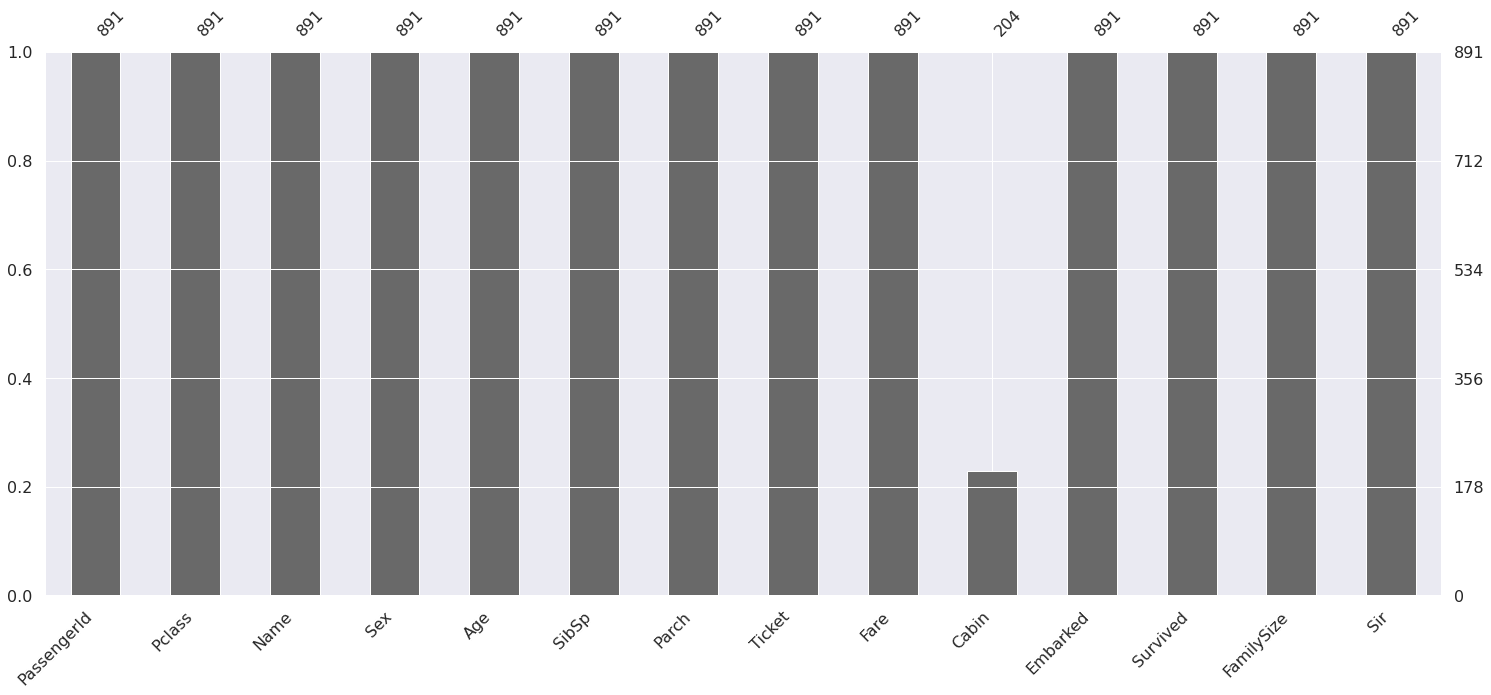

In [ ]:
# %spark.pyspark
import missingno as msno

msno.bar(df=df_train.toPandas())

In [ ]:
def get_age_category(age):
    return age//10
    

In [ ]:
udf_get_age_category = udf(lambda age: get_age_category(age), DoubleType())

In [ ]:
df_train.withColumn('Age_category', udf_get_age_category(df_train['Age'])).show()

+-----------+------+--------------------+------+-----------------+-----+-----+----------------+------------------+-----+--------+--------+----------+------+------------+
|PassengerId|Pclass|                Name|   Sex|              Age|SibSp|Parch|          Ticket|              Fare|Cabin|Embarked|Survived|FamilySize|   Sir|Age_category|
+-----------+------+--------------------+------+-----------------+-----+-----+----------------+------------------+-----+--------+--------+----------+------+------------+
|          1|     3|Braund, Mr. Owen ...|  male|             22.0|    1|    0|       A/5 21171|2.1102132003465894| null|       S|       0|         2|    Mr|         2.0|
|          2|     1|Cumings, Mrs. Joh...|female|             38.0|    1|    0|        PC 17599|   4.2805931204649|  C85|       C|       1|         2|   Mrs|         3.0|
|          3|     3|Heikkinen, Miss. ...|female|             26.0|    0|    0|STON/O2. 3101282| 2.188856327665703| null|       S|       1|         1| 

In [ ]:
df_train = df_train.withColumn('Age_category', udf_get_age_category(df_train['Age']))

In [ ]:
display(df_train)

PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived FamilySize Sir Age_category 1 3 Braund, Mr. Owen Harris male 22.0 1 0 A/5 21171 2.1102132003465894 null S 0 2 Mr 2.0 2 1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0 1 0 PC 17599 4.2805931204649 C85 C 1 2 Mrs 3.0 3 3 Heikkinen, Miss. Laina female 26.0 0 0 STON/O2. 3101282 2.188856327665703 null S 1 1 Miss 2.0 4 1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0 1 0 113803 3.9908341858524357 C123 S 1 2 Mrs 3.0 5 3 Allen, Mr. William Henry male 35.0 0 0 373450 2.2027647577118348 null S 0 1 Mr 3.0 6 3 Moran, Mr. James male 32.65158924205379 0 0 330877 2.246892662898172 null Q 0 1 Mr 3.0 7 1 McCarthy, Mr. Timothy J male 54.0 0 0 17463 3.967694202798607 E46 S 0 1 Mr 5.0 8 3 Palsson, Master. Gosta Leonard male 2.0 3 1 349909 3.094445746490024 null S 0 5 Master 0.0 9 3 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) female 27.0 0 2 347742 2.4959537387180646 null S 1 3 Mrs 2.0 10 2 Nasser, Mrs. Nicholas (Adele Achem) female 14.0 1 0 237736 3.436268471383741 null C 1 2 Mrs 1.0 11 3 Sandstrom, Miss. Marguerite Rut female 4.0 1 1 PP 9549 2.8735646395797834 G6 S 1 3 Miss 0.0 12 1 Bonnell, Miss. Elizabeth female 58.0 0 0 113783 3.3160025355989236 C103 S 1 1 Miss 5.0 13 3 Saundercock, Mr. William Henry male 20.0 0 0 A/5. 2151 2.2027647577118348 null S 0 1 Mr 2.0 14 3 Andersson, Mr. Anders Johan male 39.0 1 5 347082 3.4742929367327062 null S 0 7 Mr 3.0 15 3 Vestrom, Miss. Hulda Amanda Adolfina female 14.0 0 0 350406 2.180891922715322 null S 0 1 Miss 1.0 16 2 Hewlett, Mrs. (Mary D Kingcome) female 55.0 0 0 248706 2.833213344056216 null S 1 1 Mrs 5.0 17 3 Rice, Master. Eugene male 2.0 4 1 382652 3.405355391810819 null Q 0 6 Master 0.0 18 2 Williams, Mr. Charles Eugene male 32.65158924205379 0 0 244373 2.639057329615259 null S 1 1 Mr 3.0 19 3 Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) female 31.0 1 0 345763 2.9444389791664403 null S 0 2 Mrs 3.0 20 3 Masselmani, Mrs. Fatima female 36.0 0 0 2649 2.1071782966514356 null C 1 1 Mrs 3.0 21 2 Fynney, Mr. Joseph J male 35.0 0 0 239865 3.295836866004329 null S 0 1 Mr 3.0 22 2 Beesley, Mr. Lawrence male 34.0 0 0 248698 2.639057329615259 D56 S 1 1 Mr 3.0 23 3 "McGowan, Miss. Anna ""Annie""" female 15.0 0 0 330923 2.2004637699272855 null Q 1 1 Miss 1.0 24 1 Sloper, Mr. William Thompson male 28.0 0 0 113788 3.597312260588446 A6 S 1 1 Mr 2.0 25 3 Palsson, Miss. Torborg Danira female 8.0 3 1 349909 3.094445746490024 null S 0 5 Miss 0.0 26 3 Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) female 38.0 1 5 347077 3.4777725458882283 null S 1 7 Mrs 3.0 27 3 Emir, Mr. Farred Chehab male 32.65158924205379 0 0 2631 2.1071782966514356 null C 0 1 Mr 3.0 28 1 Fortune, Mr. Charles Alexander male 19.0 3 2 19950 5.575949103146316 C23 C25 C27 S 0 6 Mr 1.0 29 3 "O'Dwyer, Miss. Ellen ""Nellie""" female 21.86 0 0 330959 2.1837114628556327 null Q 1 1 Miss 2.0 30 3 Todoroff, Mr. Lalio male 32.65158924205379 0 0 349216 2.1855792552411137 null S 0 1 Mr 3.0 31 1 Uruchurtu, Don. Manuel E male 40.0 0 0 PC 17601 3.357621598945279 null C 0 1 Mr 4.0 32 1 Spencer, Mrs. William Augustus (Marie Eugenie) female 36.0 1 0 PC 17569 4.993969182787072 B78 C 1 2 Mrs 3.0 33 3 Glynn, Miss. Mary Agatha female 21.86 0 0 335677 2.169053700369523 null Q 1 1 Miss 2.0 34 2 Wheadon, Mr. Edward H male 66.0 0 0 C.A. 24579 2.4423470353692043 null S 0 1 Mr 6.0 35 1 Meyer, Mr. Edgar Joseph male 28.0 1 0 PC 17604 4.420896324687287 null C 0 2 Mr 2.0 36 1 Holverson, Mr. Alexander Oskar male 42.0 1 0 113789 3.970291913552122 null S 0 2 Mr 4.0 37 3 Mamee, Mr. Hanna male 32.65158924205379 0 0 2677 2.1076888046179385 null C 1 1 Mr 3.0 38 3 Cann, Mr. Ernest Charles male 21.0 0 0 A./5. 2152 2.2027647577118348 null S 0 1 Mr 2.0 39 3 Vander Planke, Miss. Augusta Maria female 18.0 2 0 345764 2.9444389791664403 null S 0 3 Miss 1.0 40 3 Nicola-Yarred, Miss. Jamila female 14.0 1 0 2651 2.5048481563289 null C 1 2 Miss 1.0 41 3 Ahlin, Mrs. Johan (

In [ ]:
#Mr, Mrs, Miss, Master, Other 총 5개로 이루어져 있습니다. 이런 카테고리로 표현되어져 있는 데이터를 모델에 인풋으로 넣어줄 때 우리가 해야할 것은 먼저 컴퓨터가 인식할 수 있도록 수치화 시켜야 합니다.

from pyspark.ml.feature import StringIndexer

In [ ]:
string_indexer = StringIndexer(inputCols=['Sir'], outputCols=['Sir_category'])

In [ ]:
sir_transformer = string_indexer.fit(df_train)

In [ ]:
sir_transformer.labels

Out[143]: ['Mr', 'Miss', 'Mrs', 'Master', 'Other']

In [ ]:
sir_transformer.transform(df_train).show()

+-----------+------+--------------------+------+-----------------+-----+-----+----------------+------------------+-----+--------+--------+----------+------+------------+------------+
|PassengerId|Pclass|                Name|   Sex|              Age|SibSp|Parch|          Ticket|              Fare|Cabin|Embarked|Survived|FamilySize|   Sir|Age_category|Sir_category|
+-----------+------+--------------------+------+-----------------+-----+-----+----------------+------------------+-----+--------+--------+----------+------+------------+------------+
|          1|     3|Braund, Mr. Owen ...|  male|             22.0|    1|    0|       A/5 21171|2.1102132003465894| null|       S|       0|         2|    Mr|         2.0|         0.0|
|          2|     1|Cumings, Mrs. Joh...|female|             38.0|    1|    0|        PC 17599|   4.2805931204649|  C85|       C|       1|         2|   Mrs|         3.0|         2.0|
|          3|     3|Heikkinen, Miss. ...|female|             26.0|    0|    0|STON/O2

In [ ]:
df_train = sir_transformer.transform(df_train)

In [ ]:
display(df_train)

PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived FamilySize Sir Age_category Sir_category 1 3 Braund, Mr. Owen Harris male 22.0 1 0 A/5 21171 2.1102132003465894 null S 0 2 Mr 2.0 0.0 2 1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0 1 0 PC 17599 4.2805931204649 C85 C 1 2 Mrs 3.0 2.0 3 3 Heikkinen, Miss. Laina female 26.0 0 0 STON/O2. 3101282 2.188856327665703 null S 1 1 Miss 2.0 1.0 4 1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0 1 0 113803 3.9908341858524357 C123 S 1 2 Mrs 3.0 2.0 5 3 Allen, Mr. William Henry male 35.0 0 0 373450 2.2027647577118348 null S 0 1 Mr 3.0 0.0 6 3 Moran, Mr. James male 32.65158924205379 0 0 330877 2.246892662898172 null Q 0 1 Mr 3.0 0.0 7 1 McCarthy, Mr. Timothy J male 54.0 0 0 17463 3.967694202798607 E46 S 0 1 Mr 5.0 0.0 8 3 Palsson, Master. Gosta Leonard male 2.0 3 1 349909 3.094445746490024 null S 0 5 Master 0.0 3.0 9 3 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) female 27.0 0 2 347742 2.4959537387180646 null S 1 3 Mrs 2.0 2.0 10 2 Nasser, Mrs. Nicholas (Adele Achem) female 14.0 1 0 237736 3.436268471383741 null C 1 2 Mrs 1.0 2.0 11 3 Sandstrom, Miss. Marguerite Rut female 4.0 1 1 PP 9549 2.8735646395797834 G6 S 1 3 Miss 0.0 1.0 12 1 Bonnell, Miss. Elizabeth female 58.0 0 0 113783 3.3160025355989236 C103 S 1 1 Miss 5.0 1.0 13 3 Saundercock, Mr. William Henry male 20.0 0 0 A/5. 2151 2.2027647577118348 null S 0 1 Mr 2.0 0.0 14 3 Andersson, Mr. Anders Johan male 39.0 1 5 347082 3.4742929367327062 null S 0 7 Mr 3.0 0.0 15 3 Vestrom, Miss. Hulda Amanda Adolfina female 14.0 0 0 350406 2.180891922715322 null S 0 1 Miss 1.0 1.0 16 2 Hewlett, Mrs. (Mary D Kingcome) female 55.0 0 0 248706 2.833213344056216 null S 1 1 Mrs 5.0 2.0 17 3 Rice, Master. Eugene male 2.0 4 1 382652 3.405355391810819 null Q 0 6 Master 0.0 3.0 18 2 Williams, Mr. Charles Eugene male 32.65158924205379 0 0 244373 2.639057329615259 null S 1 1 Mr 3.0 0.0 19 3 Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) female 31.0 1 0 345763 2.9444389791664403 null S 0 2 Mrs 3.0 2.0 20 3 Masselmani, Mrs. Fatima female 36.0 0 0 2649 2.1071782966514356 null C 1 1 Mrs 3.0 2.0 21 2 Fynney, Mr. Joseph J male 35.0 0 0 239865 3.295836866004329 null S 0 1 Mr 3.0 0.0 22 2 Beesley, Mr. Lawrence male 34.0 0 0 248698 2.639057329615259 D56 S 1 1 Mr 3.0 0.0 23 3 "McGowan, Miss. Anna ""Annie""" female 15.0 0 0 330923 2.2004637699272855 null Q 1 1 Miss 1.0 1.0 24 1 Sloper, Mr. William Thompson male 28.0 0 0 113788 3.597312260588446 A6 S 1 1 Mr 2.0 0.0 25 3 Palsson, Miss. Torborg Danira female 8.0 3 1 349909 3.094445746490024 null S 0 5 Miss 0.0 1.0 26 3 Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) female 38.0 1 5 347077 3.4777725458882283 null S 1 7 Mrs 3.0 2.0 27 3 Emir, Mr. Farred Chehab male 32.65158924205379 0 0 2631 2.1071782966514356 null C 0 1 Mr 3.0 0.0 28 1 Fortune, Mr. Charles Alexander male 19.0 3 2 19950 5.575949103146316 C23 C25 C27 S 0 6 Mr 1.0 0.0 29 3 "O'Dwyer, Miss. Ellen ""Nellie""" female 21.86 0 0 330959 2.1837114628556327 null Q 1 1 Miss 2.0 1.0 30 3 Todoroff, Mr. Lalio male 32.65158924205379 0 0 349216 2.1855792552411137 null S 0 1 Mr 3.0 0.0 31 1 Uruchurtu, Don. Manuel E male 40.0 0 0 PC 17601 3.357621598945279 null C 0 1 Mr 4.0 0.0 32 1 Spencer, Mrs. William Augustus (Marie Eugenie) female 36.0 1 0 PC 17569 4.993969182787072 B78 C 1 2 Mrs 3.0 2.0 33 3 Glynn, Miss. Mary Agatha female 21.86 0 0 335677 2.169053700369523 null Q 1 1 Miss 2.0 1.0 34 2 Wheadon, Mr. Edward H male 66.0 0 0 C.A. 24579 2.4423470353692043 null S 0 1 Mr 6.0 0.0 35 1 Meyer, Mr. Edgar Joseph male 28.0 1 0 PC 17604 4.420896324687287 null C 0 2 Mr 2.0 0.0 36 1 Holverson, Mr. Alexander Oskar male 42.0 1 0 113789 3.970291913552122 null S 0 2 Mr 4.0 0.0 37 3 Mamee, Mr. Hanna male 32.65158924205379 0 0 2677 2.1076888046179385 null C 1 1 Mr 3.0 0.0 38 3 Cann, Mr. Ernest Charles male 21.0 0 0 A./5. 2152 2.2027647577118348 null S 0 1 Mr 2.0 0.0 39 3 Vander Planke, Miss. Augusta Maria female 18.0

In [ ]:
string_indexer = StringIndexer(inputCols=['Embarked'], outputCols=['Embarked_category'])

In [ ]:
embarked_transformer = string_indexer.fit(df_train)

In [ ]:
embarked_transformer.labels

Out[149]: ['S', 'C', 'Q']

In [ ]:
embarked_transformer.transform(df_train).show()

+-----------+------+--------------------+------+-----------------+-----+-----+----------------+------------------+-----+--------+--------+----------+------+------------+------------+-----------------+
|PassengerId|Pclass|                Name|   Sex|              Age|SibSp|Parch|          Ticket|              Fare|Cabin|Embarked|Survived|FamilySize|   Sir|Age_category|Sir_category|Embarked_category|
+-----------+------+--------------------+------+-----------------+-----+-----+----------------+------------------+-----+--------+--------+----------+------+------------+------------+-----------------+
|          1|     3|Braund, Mr. Owen ...|  male|             22.0|    1|    0|       A/5 21171|2.1102132003465894| null|       S|       0|         2|    Mr|         2.0|         0.0|              0.0|
|          2|     1|Cumings, Mrs. Joh...|female|             38.0|    1|    0|        PC 17599|   4.2805931204649|  C85|       C|       1|         2|   Mrs|         3.0|         2.0|              

In [ ]:
df_train = embarked_transformer.transform(df_train)

In [ ]:
display(df_train)

PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived FamilySize Sir Age_category Sir_category Embarked_category 1 3 Braund, Mr. Owen Harris male 22.0 1 0 A/5 21171 2.1102132003465894 null S 0 2 Mr 2.0 0.0 0.0 2 1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0 1 0 PC 17599 4.2805931204649 C85 C 1 2 Mrs 3.0 2.0 1.0 3 3 Heikkinen, Miss. Laina female 26.0 0 0 STON/O2. 3101282 2.188856327665703 null S 1 1 Miss 2.0 1.0 0.0 4 1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0 1 0 113803 3.9908341858524357 C123 S 1 2 Mrs 3.0 2.0 0.0 5 3 Allen, Mr. William Henry male 35.0 0 0 373450 2.2027647577118348 null S 0 1 Mr 3.0 0.0 0.0 6 3 Moran, Mr. James male 32.65158924205379 0 0 330877 2.246892662898172 null Q 0 1 Mr 3.0 0.0 2.0 7 1 McCarthy, Mr. Timothy J male 54.0 0 0 17463 3.967694202798607 E46 S 0 1 Mr 5.0 0.0 0.0 8 3 Palsson, Master. Gosta Leonard male 2.0 3 1 349909 3.094445746490024 null S 0 5 Master 0.0 3.0 0.0 9 3 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) female 27.0 0 2 347742 2.4959537387180646 null S 1 3 Mrs 2.0 2.0 0.0 10 2 Nasser, Mrs. Nicholas (Adele Achem) female 14.0 1 0 237736 3.436268471383741 null C 1 2 Mrs 1.0 2.0 1.0 11 3 Sandstrom, Miss. Marguerite Rut female 4.0 1 1 PP 9549 2.8735646395797834 G6 S 1 3 Miss 0.0 1.0 0.0 12 1 Bonnell, Miss. Elizabeth female 58.0 0 0 113783 3.3160025355989236 C103 S 1 1 Miss 5.0 1.0 0.0 13 3 Saundercock, Mr. William Henry male 20.0 0 0 A/5. 2151 2.2027647577118348 null S 0 1 Mr 2.0 0.0 0.0 14 3 Andersson, Mr. Anders Johan male 39.0 1 5 347082 3.4742929367327062 null S 0 7 Mr 3.0 0.0 0.0 15 3 Vestrom, Miss. Hulda Amanda Adolfina female 14.0 0 0 350406 2.180891922715322 null S 0 1 Miss 1.0 1.0 0.0 16 2 Hewlett, Mrs. (Mary D Kingcome) female 55.0 0 0 248706 2.833213344056216 null S 1 1 Mrs 5.0 2.0 0.0 17 3 Rice, Master. Eugene male 2.0 4 1 382652 3.405355391810819 null Q 0 6 Master 0.0 3.0 2.0 18 2 Williams, Mr. Charles Eugene male 32.65158924205379 0 0 244373 2.639057329615259 null S 1 1 Mr 3.0 0.0 0.0 19 3 Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) female 31.0 1 0 345763 2.9444389791664403 null S 0 2 Mrs 3.0 2.0 0.0 20 3 Masselmani, Mrs. Fatima female 36.0 0 0 2649 2.1071782966514356 null C 1 1 Mrs 3.0 2.0 1.0 21 2 Fynney, Mr. Joseph J male 35.0 0 0 239865 3.295836866004329 null S 0 1 Mr 3.0 0.0 0.0 22 2 Beesley, Mr. Lawrence male 34.0 0 0 248698 2.639057329615259 D56 S 1 1 Mr 3.0 0.0 0.0 23 3 "McGowan, Miss. Anna ""Annie""" female 15.0 0 0 330923 2.2004637699272855 null Q 1 1 Miss 1.0 1.0 2.0 24 1 Sloper, Mr. William Thompson male 28.0 0 0 113788 3.597312260588446 A6 S 1 1 Mr 2.0 0.0 0.0 25 3 Palsson, Miss. Torborg Danira female 8.0 3 1 349909 3.094445746490024 null S 0 5 Miss 0.0 1.0 0.0 26 3 Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) female 38.0 1 5 347077 3.4777725458882283 null S 1 7 Mrs 3.0 2.0 0.0 27 3 Emir, Mr. Farred Chehab male 32.65158924205379 0 0 2631 2.1071782966514356 null C 0 1 Mr 3.0 0.0 1.0 28 1 Fortune, Mr. Charles Alexander male 19.0 3 2 19950 5.575949103146316 C23 C25 C27 S 0 6 Mr 1.0 0.0 0.0 29 3 "O'Dwyer, Miss. Ellen ""Nellie""" female 21.86 0 0 330959 2.1837114628556327 null Q 1 1 Miss 2.0 1.0 2.0 30 3 Todoroff, Mr. Lalio male 32.65158924205379 0 0 349216 2.1855792552411137 null S 0 1 Mr 3.0 0.0 0.0 31 1 Uruchurtu, Don. Manuel E male 40.0 0 0 PC 17601 3.357621598945279 null C 0 1 Mr 4.0 0.0 1.0 32 1 Spencer, Mrs. William Augustus (Marie Eugenie) female 36.0 1 0 PC 17569 4.993969182787072 B78 C 1 2 Mrs 3.0 2.0 1.0 33 3 Glynn, Miss. Mary Agatha female 21.86 0 0 335677 2.169053700369523 null Q 1 1 Miss 2.0 1.0 2.0 34 2 Wheadon, Mr. Edward H male 66.0 0 0 C.A. 24579 2.4423470353692043 null S 0 1 Mr 6.0 0.0 0.0 35 1 Meyer, Mr. Edgar Joseph male 28.0 1 0 PC 17604 4.420896324687287 null C 0 2 Mr 2.0 0.0 1.0 36 1 Holverson, Mr. Alexander Oskar male 42.0 1 0 113789 3.970291913552122 null S 0 2 Mr 4.0 0.0 0.0 37 3 Mamee, Mr. Hanna male 32.65158924205379 0 0 2677 2.1076888046179385 null C 

In [ ]:
string_indexer = StringIndexer(inputCols=['Sex'], outputCols=['Sex_category'])

In [ ]:
sex_transformer = string_indexer.fit(df_train)

In [ ]:
sex_transformer.labels

Out[155]: ['male', 'female']

In [ ]:
sex_transformer.transform(df_train).show()

+-----------+------+--------------------+------+-----------------+-----+-----+----------------+------------------+-----+--------+--------+----------+------+------------+------------+-----------------+------------+
|PassengerId|Pclass|                Name|   Sex|              Age|SibSp|Parch|          Ticket|              Fare|Cabin|Embarked|Survived|FamilySize|   Sir|Age_category|Sir_category|Embarked_category|Sex_category|
+-----------+------+--------------------+------+-----------------+-----+-----+----------------+------------------+-----+--------+--------+----------+------+------------+------------+-----------------+------------+
|          1|     3|Braund, Mr. Owen ...|  male|             22.0|    1|    0|       A/5 21171|2.1102132003465894| null|       S|       0|         2|    Mr|         2.0|         0.0|              0.0|         0.0|
|          2|     1|Cumings, Mrs. Joh...|female|             38.0|    1|    0|        PC 17599|   4.2805931204649|  C85|       C|       1|      

In [ ]:
df_train = sex_transformer.transform(df_train)

In [ ]:
display(df_train)

PassengerId Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked Survived FamilySize Sir Age_category Sir_category Embarked_category Sex_category 1 3 Braund, Mr. Owen Harris male 22.0 1 0 A/5 21171 2.1102132003465894 null S 0 2 Mr 2.0 0.0 0.0 0.0 2 1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0 1 0 PC 17599 4.2805931204649 C85 C 1 2 Mrs 3.0 2.0 1.0 1.0 3 3 Heikkinen, Miss. Laina female 26.0 0 0 STON/O2. 3101282 2.188856327665703 null S 1 1 Miss 2.0 1.0 0.0 1.0 4 1 Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0 1 0 113803 3.9908341858524357 C123 S 1 2 Mrs 3.0 2.0 0.0 1.0 5 3 Allen, Mr. William Henry male 35.0 0 0 373450 2.2027647577118348 null S 0 1 Mr 3.0 0.0 0.0 0.0 6 3 Moran, Mr. James male 32.65158924205379 0 0 330877 2.246892662898172 null Q 0 1 Mr 3.0 0.0 2.0 0.0 7 1 McCarthy, Mr. Timothy J male 54.0 0 0 17463 3.967694202798607 E46 S 0 1 Mr 5.0 0.0 0.0 0.0 8 3 Palsson, Master. Gosta Leonard male 2.0 3 1 349909 3.094445746490024 null S 0 5 Master 0.0 3.0 0.0 0.0 9 3 Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) female 27.0 0 2 347742 2.4959537387180646 null S 1 3 Mrs 2.0 2.0 0.0 1.0 10 2 Nasser, Mrs. Nicholas (Adele Achem) female 14.0 1 0 237736 3.436268471383741 null C 1 2 Mrs 1.0 2.0 1.0 1.0 11 3 Sandstrom, Miss. Marguerite Rut female 4.0 1 1 PP 9549 2.8735646395797834 G6 S 1 3 Miss 0.0 1.0 0.0 1.0 12 1 Bonnell, Miss. Elizabeth female 58.0 0 0 113783 3.3160025355989236 C103 S 1 1 Miss 5.0 1.0 0.0 1.0 13 3 Saundercock, Mr. William Henry male 20.0 0 0 A/5. 2151 2.2027647577118348 null S 0 1 Mr 2.0 0.0 0.0 0.0 14 3 Andersson, Mr. Anders Johan male 39.0 1 5 347082 3.4742929367327062 null S 0 7 Mr 3.0 0.0 0.0 0.0 15 3 Vestrom, Miss. Hulda Amanda Adolfina female 14.0 0 0 350406 2.180891922715322 null S 0 1 Miss 1.0 1.0 0.0 1.0 16 2 Hewlett, Mrs. (Mary D Kingcome) female 55.0 0 0 248706 2.833213344056216 null S 1 1 Mrs 5.0 2.0 0.0 1.0 17 3 Rice, Master. Eugene male 2.0 4 1 382652 3.405355391810819 null Q 0 6 Master 0.0 3.0 2.0 0.0 18 2 Williams, Mr. Charles Eugene male 32.65158924205379 0 0 244373 2.639057329615259 null S 1 1 Mr 3.0 0.0 0.0 0.0 19 3 Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) female 31.0 1 0 345763 2.9444389791664403 null S 0 2 Mrs 3.0 2.0 0.0 1.0 20 3 Masselmani, Mrs. Fatima female 36.0 0 0 2649 2.1071782966514356 null C 1 1 Mrs 3.0 2.0 1.0 1.0 21 2 Fynney, Mr. Joseph J male 35.0 0 0 239865 3.295836866004329 null S 0 1 Mr 3.0 0.0 0.0 0.0 22 2 Beesley, Mr. Lawrence male 34.0 0 0 248698 2.639057329615259 D56 S 1 1 Mr 3.0 0.0 0.0 0.0 23 3 "McGowan, Miss. Anna ""Annie""" female 15.0 0 0 330923 2.2004637699272855 null Q 1 1 Miss 1.0 1.0 2.0 1.0 24 1 Sloper, Mr. William Thompson male 28.0 0 0 113788 3.597312260588446 A6 S 1 1 Mr 2.0 0.0 0.0 0.0 25 3 Palsson, Miss. Torborg Danira female 8.0 3 1 349909 3.094445746490024 null S 0 5 Miss 0.0 1.0 0.0 1.0 26 3 Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) female 38.0 1 5 347077 3.4777725458882283 null S 1 7 Mrs 3.0 2.0 0.0 1.0 27 3 Emir, Mr. Farred Chehab male 32.65158924205379 0 0 2631 2.1071782966514356 null C 0 1 Mr 3.0 0.0 1.0 0.0 28 1 Fortune, Mr. Charles Alexander male 19.0 3 2 19950 5.575949103146316 C23 C25 C27 S 0 6 Mr 1.0 0.0 0.0 0.0 29 3 "O'Dwyer, Miss. Ellen ""Nellie""" female 21.86 0 0 330959 2.1837114628556327 null Q 1 1 Miss 2.0 1.0 2.0 1.0 30 3 Todoroff, Mr. Lalio male 32.65158924205379 0 0 349216 2.1855792552411137 null S 0 1 Mr 3.0 0.0 0.0 0.0 31 1 Uruchurtu, Don. Manuel E male 40.0 0 0 PC 17601 3.357621598945279 null C 0 1 Mr 4.0 0.0 1.0 0.0 32 1 Spencer, Mrs. William Augustus (Marie Eugenie) female 36.0 1 0 PC 17569 4.993969182787072 B78 C 1 2 Mrs 3.0 2.0 1.0 1.0 33 3 Glynn, Miss. Mary Agatha female 21.86 0 0 335677 2.169053700369523 null Q 1 1 Miss 2.0 1.0 2.0 1.0 34 2 Wheadon, Mr. Edward H male 66.0 0 0 C.A. 24579 2.4423470353692043 null S 0 1 Mr 6.0 0.0 0.0 0.0 35 1 Meyer, Mr. Edgar Joseph male 28.0 1 0 PC 17604 4.420896324687287 null C 0 2 Mr 2.0 0.0 1.0 0.0 36 1 Holverson, Mr. Alexande